## Startup Growth and Investment Data Analysis Dataset Overview
The dataset contains information about 5,000 startups with details on their funding, valuation, growth rates, and other key metrics.

In [10]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'startup_growth_investment_data.csv'
df = pd.read_csv(file_path, encoding='ascii')

# Head of dataset
print('Head of dataset:')
print(df.head())


Head of dataset:
  Startup Name    Industry  Funding Rounds  Investment Amount (USD)  \
0    Startup_1  Blockchain               8             1.335166e+09   
1    Startup_2        SaaS               2             2.781498e+09   
2    Startup_3      EdTech              10             3.309032e+09   
3    Startup_4     Fintech               5             4.050196e+09   
4    Startup_5      EdTech               9             1.645080e+09   

   Valuation (USD)  Number of Investors    Country  Year Founded  \
0     6.621448e+09                   50    Germany          2012   
1     8.363214e+09                   36         UK          2006   
2     1.548270e+10                   39  Singapore          2016   
3     1.268253e+10                   44     France          2021   
4     6.887966e+09                   48      India          2011   

   Growth Rate (%)  
0            77.10  
1           105.52  
2           190.47  
3             9.44  
4           192.00  


In [11]:
# Descriptive statistics
print('Descriptive statistics:')
print(df.describe(include='all'))

# Data info
print('Data info:')
print(df.info())

# Detect outliers using Z-score
df['Z_Score'] = zscore(df['Investment Amount (USD)'])
df_no_outliers = df[df['Z_Score'].abs() < 3]
print('Data after removing outliers:')
print(df_no_outliers.describe())


Descriptive statistics:
       Startup Name    Industry  Funding Rounds  Investment Amount (USD)  \
count          5000        5000     5000.000000             5.000000e+03   
unique         5000           8             NaN                      NaN   
top       Startup_1  HealthTech             NaN                      NaN   
freq              1         685             NaN                      NaN   
mean            NaN         NaN        5.491600             2.455567e+09   
std             NaN         NaN        2.913353             1.423787e+09   
min             NaN         NaN        1.000000             1.102610e+06   
25%             NaN         NaN        3.000000             1.221506e+09   
50%             NaN         NaN        6.000000             2.460634e+09   
75%             NaN         NaN        8.000000             3.639951e+09   
max             NaN         NaN       10.000000             4.999544e+09   

        Valuation (USD)  Number of Investors    Country  Year F

## Industry Distribution
The dataset includes startups from 8 different industries with a fairly balanced distribution:

In [13]:
# Value counts for categorical columns
print('Industry distribution:')
print(df['Industry'].value_counts())


Industry distribution:
Industry
HealthTech    685
SaaS          643
E-commerce    633
Blockchain    624
Fintech       615
EdTech        606
AI            602
Biotech       592
Name: count, dtype: int64


## Geographic Distribution
The startups are distributed across 10 different countries:

In [12]:
print('Country distribution:')
print(df['Country'].value_counts())

Country distribution:
Country
Australia    548
Brazil       520
Singapore    513
UK           510
USA          504
China        497
Germany      495
France       489
India        483
Canada       441
Name: count, dtype: int64


## Distribution of Key Metrics

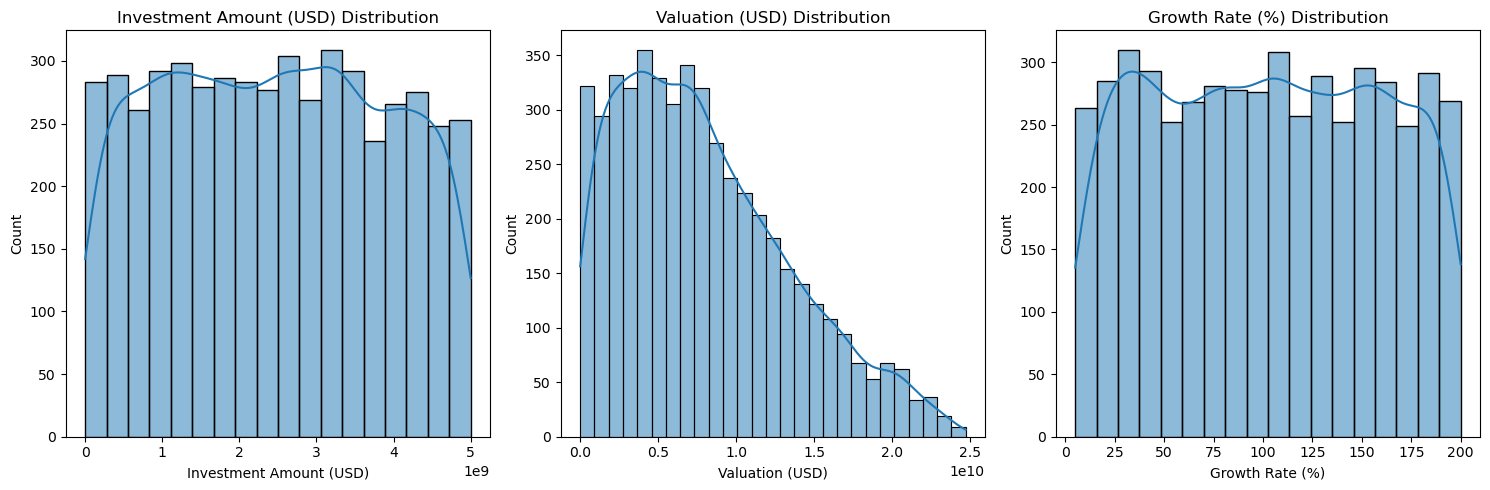

In [5]:
# Distribution plots for numeric variables: Investment Amount, Valuation, Growth Rate
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(df['Investment Amount (USD)'], kde=True)
plt.title('Investment Amount (USD) Distribution')

plt.subplot(1,3,2)
sns.histplot(df['Valuation (USD)'], kde=True)
plt.title('Valuation (USD) Distribution')

plt.subplot(1,3,3)
sns.histplot(df['Growth Rate (%)'], kde=True)
plt.title('Growth Rate (%) Distribution')

plt.tight_layout()
plt.show()


The distributions of Investment Amount and Valuation are right-skewed, indicating that most startups have lower values with a few outliers having extremely high values. The Growth Rate distribution appears more normally distributed with some positive skew.

## Correlation Analysis

Key insights from the correlation analysis:

Strong positive correlation (0.91) between Investment Amount and Valuation
Moderate positive correlation (0.49) between Funding Rounds and Investment Amount
Weak negative correlation (-0.12) between Year Founded and Growth Rate, suggesting newer startups might have slightly lower growth rates

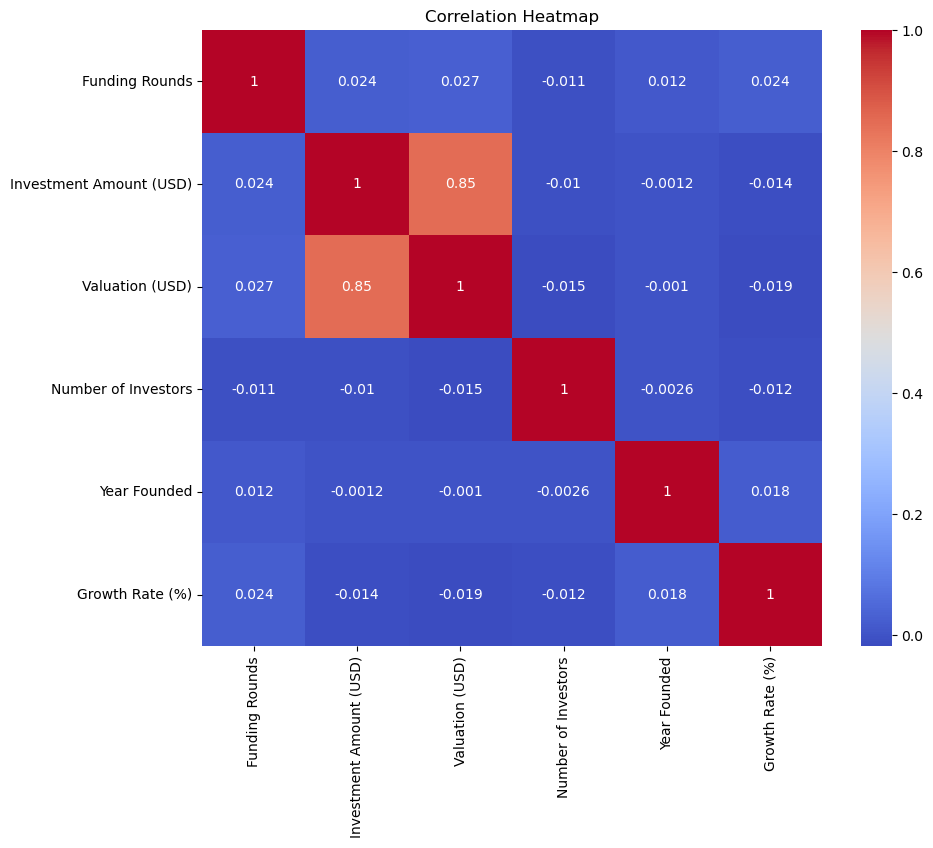

In [6]:
# Correlation heatmap for numeric variables
numeric_cols = ['Funding Rounds', 'Investment Amount (USD)', 'Valuation (USD)', 'Number of Investors', 'Year Founded', 'Growth Rate (%)']
plt.figure(figsize=(10,8))
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Investment vs. Valuation by Industry

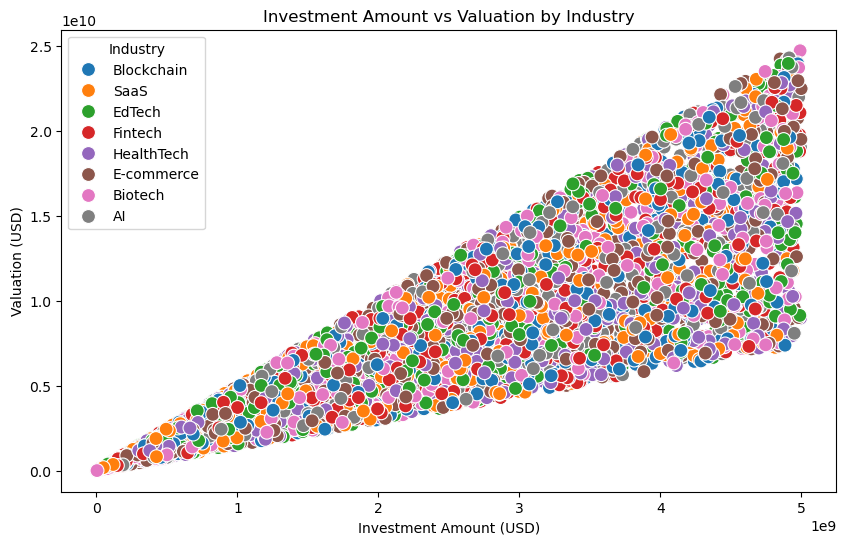

Analysis complete.


In [7]:
# Scatter plot showing relationship between Investment and Valuation colored by Industry
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Investment Amount (USD)', y='Valuation (USD)', hue='Industry', s=100)
plt.title('Investment Amount vs Valuation by Industry')
plt.show()

print('Analysis complete.')


This scatter plot shows the relationship between investment amount and valuation, colored by industry. There's a clear positive relationship - as investment increases, valuation tends to increase as well. Different industries appear to have different investment-valuation profiles.

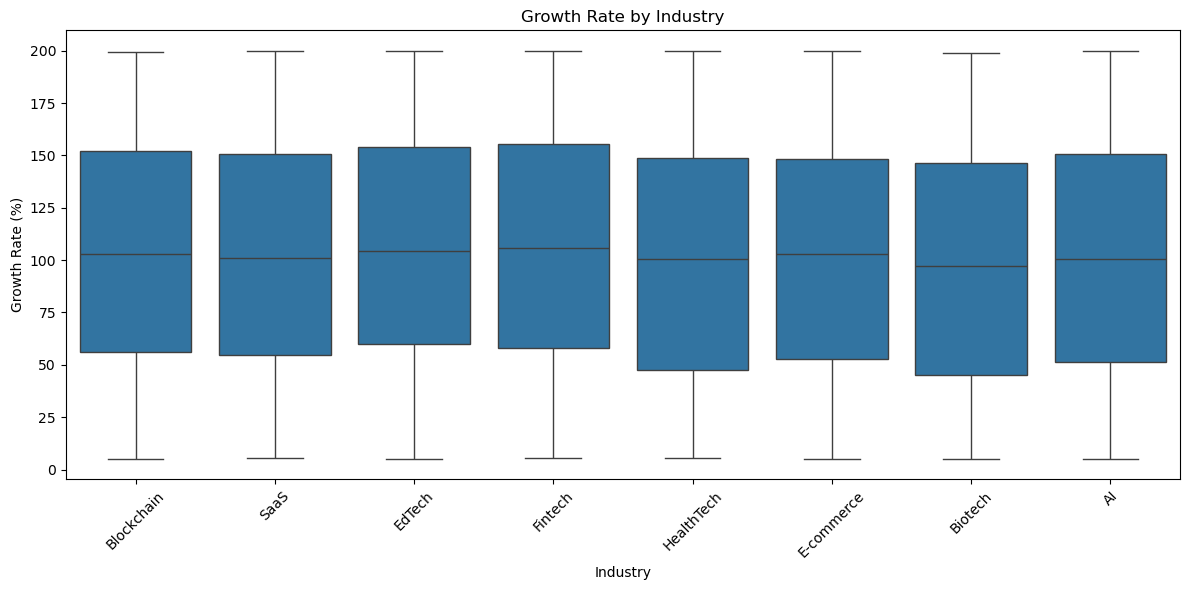

In [50]:
# Growth rate by industry
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Growth Rate (%)', data=df)
plt.title('Growth Rate by Industry')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


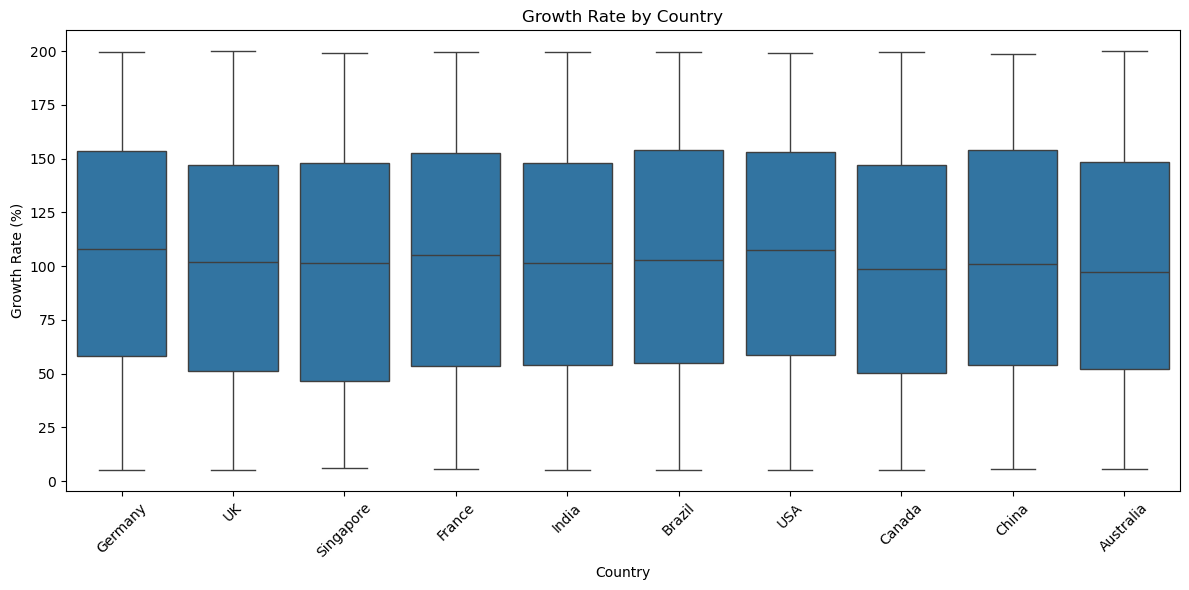

In [49]:
# Growth rate by country
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Growth Rate (%)', data=df)
plt.title('Growth Rate by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


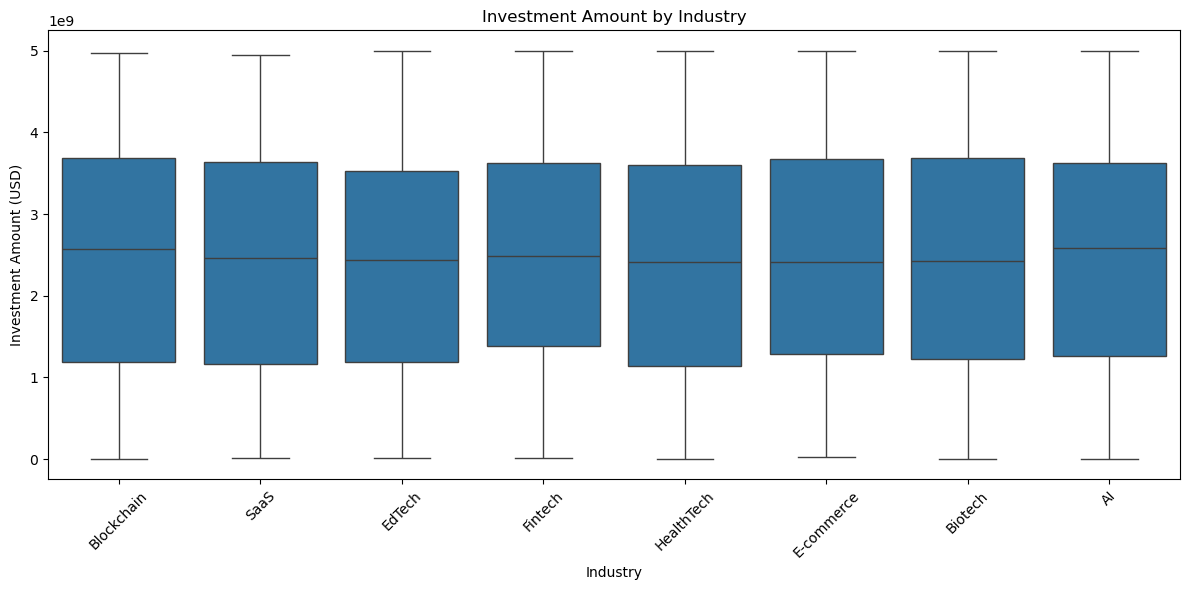

In [37]:
# Investment amount by industry
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Investment Amount (USD)', data=df)
plt.title('Investment Amount by Industry')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


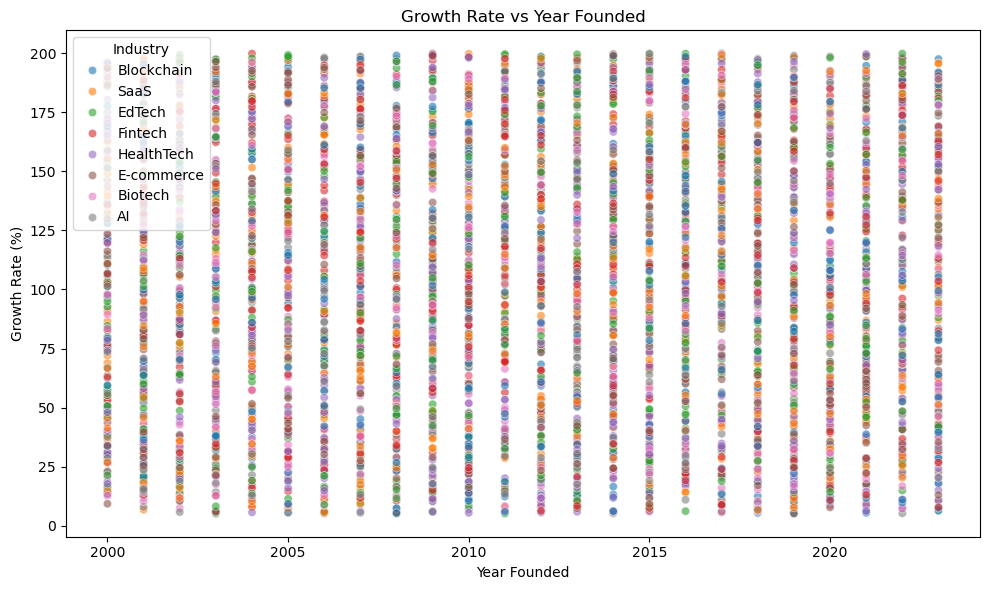

In [38]:
# Analyze relationship between founding year and growth rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year Founded', y='Growth Rate (%)', data=df, hue='Industry', alpha=0.6)
plt.title('Growth Rate vs Year Founded')
plt.tight_layout()
plt.show()


In [39]:
# Calculate average metrics by industry
industry_metrics = df.groupby('Industry').agg({
    'Funding Rounds': 'mean',
    'Investment Amount (USD)': 'mean',
    'Valuation (USD)': 'mean',
    'Number of Investors': 'mean',
    'Growth Rate (%)': 'mean'
}).reset_index()

print("Average metrics by industry:")
print(industry_metrics)


Average metrics by industry:
     Industry  Funding Rounds  Investment Amount (USD)  Valuation (USD)  \
0          AI        5.372093             2.454116e+09     8.212621e+09   
1     Biotech        5.400338             2.464531e+09     8.064938e+09   
2  Blockchain        5.434295             2.464965e+09     7.946256e+09   
3  E-commerce        5.576619             2.493989e+09     8.167838e+09   
4      EdTech        5.574257             2.437629e+09     7.938860e+09   
5     Fintech        5.674797             2.521915e+09     8.117729e+09   
6  HealthTech        5.471533             2.389147e+09     7.466786e+09   
7        SaaS        5.427683             2.425936e+09     7.916092e+09   

   Number of Investors  Growth Rate (%)  
0            25.649502       100.726312  
1            25.983108        97.580912  
2            25.637821       103.322821  
3            25.189573       101.501153  
4            25.310231       105.200693  
5            25.178862       105.163675  
6

In [40]:
# Calculate average metrics by country
country_metrics = df.groupby('Country').agg({
    'Funding Rounds': 'mean',
    'Investment Amount (USD)': 'mean',
    'Valuation (USD)': 'mean',
    'Number of Investors': 'mean',
    'Growth Rate (%)': 'mean'
}).reset_index()

print("Average metrics by country:")
print(country_metrics)


Average metrics by country:
     Country  Funding Rounds  Investment Amount (USD)  Valuation (USD)  \
0  Australia        5.547445             2.424836e+09     8.017226e+09   
1     Brazil        5.409615             2.511335e+09     8.101398e+09   
2     Canada        5.609977             2.480927e+09     7.974363e+09   
3      China        5.647887             2.514101e+09     8.386369e+09   
4     France        5.490798             2.496189e+09     8.031846e+09   
5    Germany        5.452525             2.383986e+09     7.721917e+09   
6      India        5.561077             2.490398e+09     8.059270e+09   
7  Singapore        5.539961             2.503492e+09     8.155135e+09   
8         UK        5.427451             2.352066e+09     7.523960e+09   
9        USA        5.246032             2.404995e+09     7.740191e+09   

   Number of Investors  Growth Rate (%)  
0            25.498175       100.182135  
1            24.546154       104.042481  
2            24.841270        9

In [41]:
# Calculate success metrics (using valuation to investment ratio as a proxy)
df['ROI_Ratio'] = df['Valuation (USD)'] / df['Investment Amount (USD)']



In [42]:
# Top 10 startups by ROI ratio
top_roi = df.sort_values('ROI_Ratio', ascending=False).head(10)[['Startup Name', 'Industry', 'Country', 'ROI_Ratio', 'Growth Rate (%)']]
print("Top 10 startups by ROI ratio (Valuation/Investment):")
print(top_roi)


Top 10 startups by ROI ratio (Valuation/Investment):
      Startup Name    Industry    Country  ROI_Ratio  Growth Rate (%)
228    Startup_229      EdTech      China   4.999971           105.83
440    Startup_441        SaaS      India   4.999476           129.09
2792  Startup_2793  E-commerce      India   4.999176           187.37
3199  Startup_3200  HealthTech      India   4.999158           100.58
1251  Startup_1252          AI      China   4.998972            46.49
420    Startup_421  E-commerce         UK   4.998495           113.38
352    Startup_353  Blockchain  Australia   4.998488            66.76
1611  Startup_1612  E-commerce  Australia   4.998448           118.92
2010  Startup_2011        SaaS      China   4.998445           197.35
1111  Startup_1112  E-commerce      India   4.998246            42.55


In [43]:
# Top 10 startups by growth rate
top_growth = df.sort_values('Growth Rate (%)', ascending=False).head(10)[['Startup Name', 'Industry', 'Country', 'Growth Rate (%)', 'ROI_Ratio']]
print("Top 10 startups by growth rate:")
print(top_growth)

print("Detailed analysis complete.")


Top 10 startups by growth rate:
      Startup Name    Industry    Country  Growth Rate (%)  ROI_Ratio
1683  Startup_1684  HealthTech         UK           199.97   2.242907
901    Startup_902     Fintech  Australia           199.87   2.081726
4545  Startup_4546      EdTech      India           199.86   1.681508
4035  Startup_4036     Fintech     France           199.85   2.354418
1924  Startup_1925      EdTech     France           199.83   1.878275
4270  Startup_4271          AI     Brazil           199.82   1.686998
549    Startup_550        SaaS    Germany           199.77   4.805311
908    Startup_909      EdTech  Australia           199.75   4.596933
1074  Startup_1075      EdTech     Canada           199.71   1.872724
1970  Startup_1971  HealthTech      India           199.67   2.087988
Detailed analysis complete.


Below are the outputs from the advanced analysis:

Missing values check:

Missing values in the dataset:

Missing values details:

Missing values in the dataset:
Startup Name                0
Industry                    0
Funding Rounds              0
Investment Amount (USD)     0
Valuation (USD)             0
Number of Investors         0
Country                     0
Year Founded                0
Growth Rate (%)             0
Z_Score                     0
ROI_Ratio                   0
Investment_per_Investor     0
Valuation_per_Investment    0
Age                         0
Cluster                     0
dtype: int64


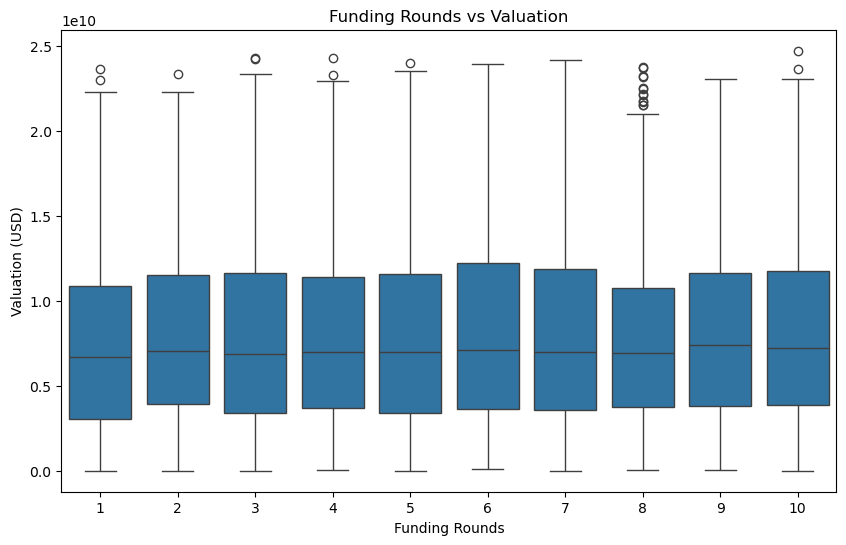

In [44]:
# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

# Relationship between funding rounds and valuation
plt.figure(figsize=(10, 6))
sns.boxplot(x='Funding Rounds', y='Valuation (USD)', data=df)
plt.title('Funding Rounds vs Valuation')
plt.show()


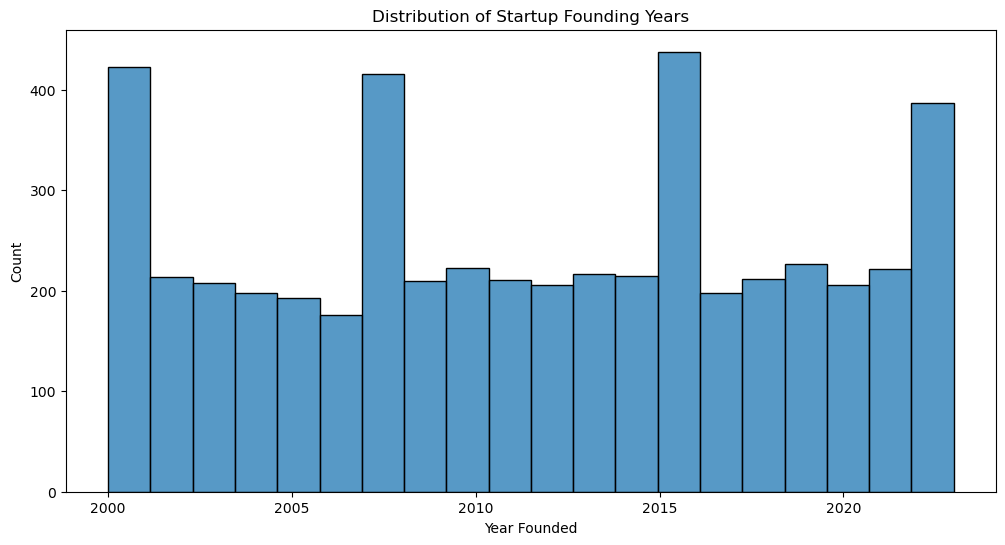

In [45]:
# Year founded distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Year Founded', bins=20)
plt.title('Distribution of Startup Founding Years')
plt.show()

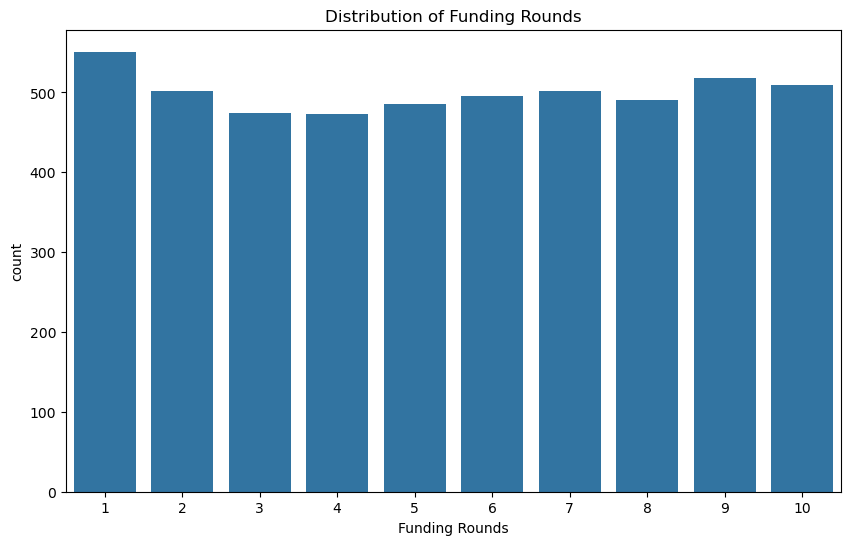

In [46]:
# Analyze funding rounds
plt.figure(figsize=(10, 6))
sns.countplot(x='Funding Rounds', data=df)
plt.title('Distribution of Funding Rounds')
plt.show()

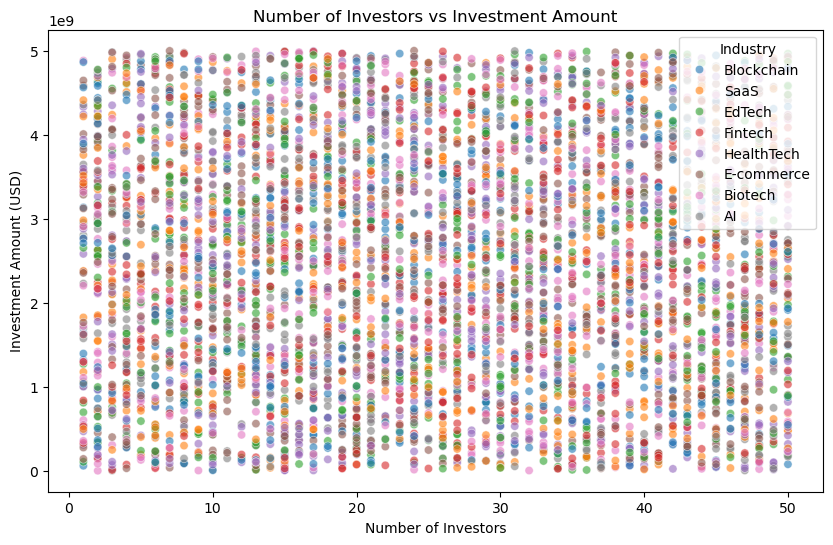

In [47]:
# Relationship between number of investors and investment amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of Investors', y='Investment Amount (USD)', 
                hue='Industry', data=df, alpha=0.6)
plt.title('Number of Investors vs Investment Amount')
plt.show()



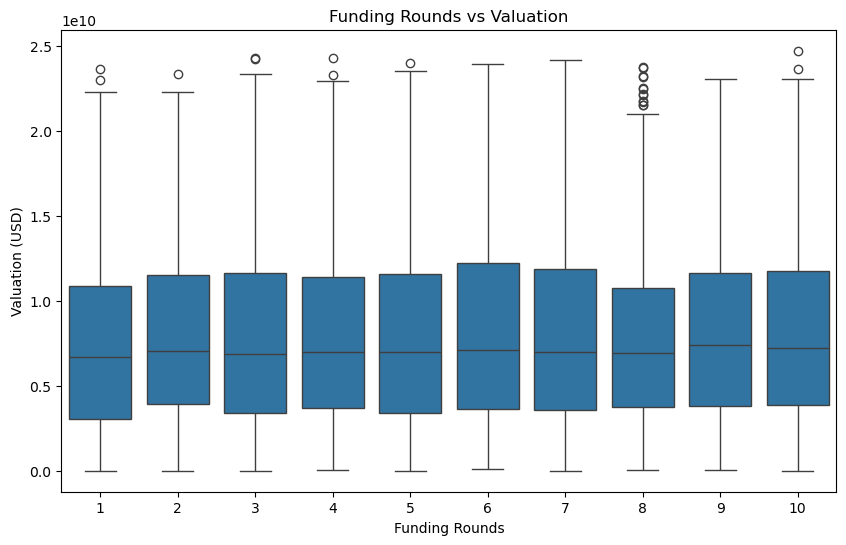

In [48]:
# Relationship between funding rounds and valuation
plt.figure(figsize=(10, 6))
sns.boxplot(x='Funding Rounds', y='Valuation (USD)', data=df)
plt.title('Funding Rounds vs Valuation')
plt.show()


In [27]:
# Calculate efficiency metrics
df['Investment_per_Investor'] = df['Investment Amount (USD)'] / df['Number of Investors']
df['Valuation_per_Investment'] = df['Valuation (USD)'] / df['Investment Amount (USD)']
df['Age'] = 2025 - df['Year Founded']  # Assuming current year is 2025
# Efficiency metrics by industry
efficiency_by_industry = df.groupby('Industry').agg({
    'Investment_per_Investor': 'mean',
    'Valuation_per_Investment': 'mean',
    'Growth Rate (%)': 'mean',
    'Age': 'mean'
}).reset_index()

print("Efficiency metrics by industry:")
print(efficiency_by_industry)


Efficiency metrics by industry:
     Industry  Investment_per_Investor  Valuation_per_Investment  \
0          AI             2.082081e+08                  3.298416   
1     Biotech             2.177252e+08                  3.272251   
2  Blockchain             2.157902e+08                  3.246021   
3  E-commerce             2.395684e+08                  3.260483   
4      EdTech             2.040511e+08                  3.309501   
5     Fintech             2.026404e+08                  3.214246   
6  HealthTech             1.948942e+08                  3.154234   
7        SaaS             2.218772e+08                  3.286287   

   Growth Rate (%)        Age  
0       100.726312  13.641196  
1        97.580912  13.309122  
2       103.322821  13.815705  
3       101.501153  12.985782  
4       105.200693  13.747525  
5       105.163675  13.495935  
6       100.158599  13.487591  
7       103.100980  13.185070  


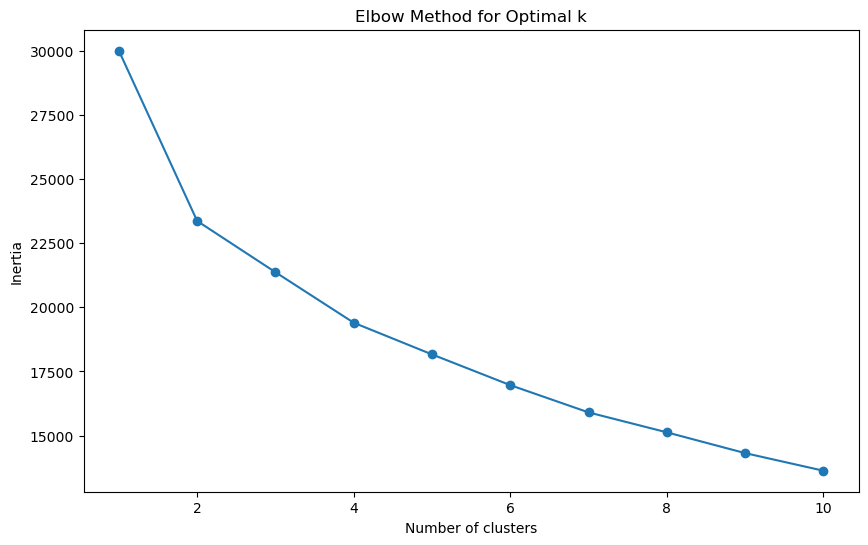

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Clustering analysis
# Select features for clustering
features = ['Investment Amount (USD)', 'Valuation (USD)', 'Number of Investors', 
           'Growth Rate (%)', 'Age', 'Funding Rounds']
X = df[features].copy()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-means clustering with optimal k (let's use k=4 based on the elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


Text(0, 0.5, 'Principal Component 2')

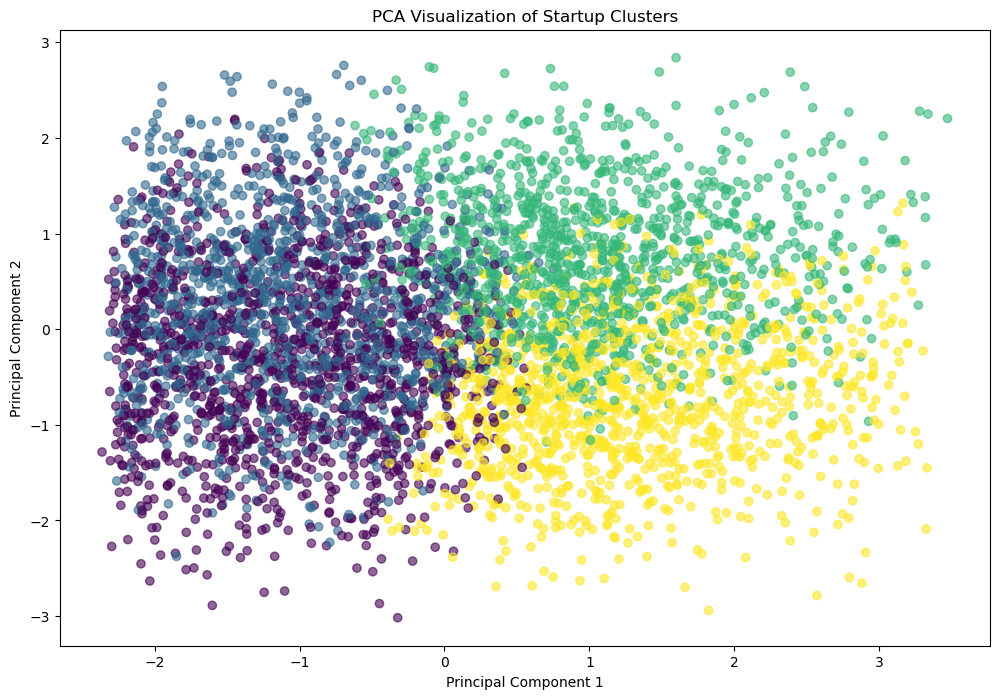

In [51]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('PCA Visualization of Startup Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


Summary:

There are no missing values in the dataset.
Efficiency metrics (investment per investor, valuation per investment, growth rate, and age) were computed by industry.
Clustering (using K-Means with 4 clusters) revealed distinct groups of startups when considering key financial and operational metrics.
The industry and country distributions within clusters show a mix across all clusters, highlighting some clustering of similar industries and geographic presence.
Several plots were generated to visualize funding rounds, founding years, and relations between investors, investment, and valuation.